In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import preprocessing

In [2]:
data=pd.read_csv("data.csv")
data.head()

,id,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19
0,0,97,123,9,0.000000,0.0,1.555555,1.096294,13.222221,108.740740,52.814816,48.000000,64.111115,46.333332,-14.444445,33.888890,-19.444445,64.111115,0.280593,-1.994105
1,1,37,189,9,0.000000,0.0,1.388889,1.485184,5.722223,23.885176,30.000000,27.111110,36.333336,26.555555,-8.666667,19.000000,-10.333333,36.333336,0.265248,-2.050282
2,2,148,169,9,0.111111,0.0,1.055555,0.774073,1.833333,2.611110,19.592592,15.111111,18.666668,25.000000,-13.444445,-2.777778,16.222221,25.000000,0.396121,2.467752
3,3,95,57,9,0.000000,0.0,1.833333,3.411111,2.111111,1.718517,26.296297,24.666666,34.444447,19.777779,-4.888889,24.444445,-19.555555,34.444447,0.425691,-1.739017
4,4,200,189,9,0.000000,0.0,1.111111,1.088662,3.166667,1.005541,49.666668,45.111110,60.888890,43.000000,-13.666667,33.666668,-20.000000,60.888890,0.293810,-1.973221


In [3]:
scaler=preprocessing.StandardScaler().fit(data)
transdata=scaler.transform(data)
transdata[:5]

array([[-1.73122622, -0.38358021, -0.00841784,  0.        , -0.36379496,
        -0.19307375, -0.12657128, -0.10253767,  3.11762723,  1.88626347,
         0.41355177,  0.4342664 ,  0.4576016 ,  0.3362047 , -0.14858995,
         0.63183451, -0.92153484,  0.44179463, -0.64213554, -0.40738018],
       [-1.72957665, -1.20728888,  1.14105244,  0.        , -0.36379496,
        -0.19307375, -0.18949207, -0.09389155,  0.95570136,  0.29894217,
        -0.18485064, -0.16279436, -0.18097158, -0.20871085,  0.35011971,
        -0.1258919 , -0.13638061, -0.20585148, -0.70932014, -0.44376617],
       [-1.72792707,  0.31657216,  0.79272812,  0.        ,  2.34531645,
        -0.19307375, -0.31533442, -0.10970152, -0.16529786, -0.09901381,
        -0.45782317, -0.50578666, -0.58710413, -0.25156936, -0.06227482,
        -1.23420805,  2.15205636, -0.47009115, -0.13632893,  2.48259205],
       [-1.7262775 , -0.41103716, -1.15788812,  0.        , -0.36379496,
        -0.19307375, -0.021703  , -0.05107287, -

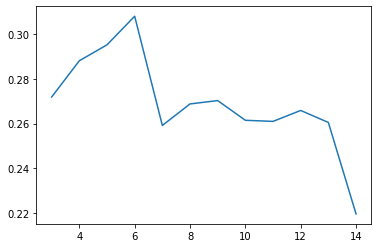

In [4]:
silhouette_avg=[]
for i in range(3,15):
    kmeans_fit=KMeans(n_clusters=i).fit(transdata)
    silhouette_avg.append(silhouette_score(transdata,kmeans_fit.labels_))
plt.plot(range(3,15),silhouette_avg)    

In [5]:
kmeans=KMeans(n_clusters=6)
kmeans.fit(transdata)
ref=kmeans.predict(transdata)
ref[:5]

array([1, 1, 2, 0, 1])

In [6]:
test=pd.read_csv("test.csv")
col_name=['index','ans']
ans=pd.DataFrame(columns=col_name)
for i in test['index']:
    tar1=test.at[i,'0']
    tar2=test.at[i,'1']
    if ref[tar1]==ref[tar2]:
        dic={'index':i,'ans':1}
        ans.loc[len(ans)]=dic
    else:
        dic={'index':i,'ans':0}
        ans.loc[len(ans)]=dic

In [8]:
ans.set_index("index",inplace=True)
ans.head(20)

,ans
index,
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1


In [10]:
ans.to_csv("export.csv")